In [33]:
import numpy as np 
import pandas as pd

First, Generate Dataset

In [34]:
import numpy as np

np.random.seed(42)
centers = np.array([
    [0, 0, 0, 0, 0],
    [5, 5, 5, 5, 5],
    [11, 11, 11, 11, 11]
])

n_observations = 40
variance = 2

data = []
for center in centers:
    cov_matrix = np.eye(5) * variance
    group = np.random.multivariate_normal(center, cov_matrix, n_observations)
    data.append(group)

dataset = np.vstack(data)

outliers = np.array([
    [-12, 5, 0, 0, 0],
    [100, 11, 11, 5, 5],
    [-100, 0, 0, 0, -100]
])

dataset = np.vstack([dataset, outliers])


print(dataset.shape)  

(123, 5)


In [35]:
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = ((X[:, np.newaxis] - centroids) ** 2).sum(axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    cost = np.sum(np.min(distances, axis=1))
    return centroids, labels, cost


k = 3  
centroids, labels, cost = kmeans(dataset, k)

print("Final Centroids:")
print(centroids)
print("\nCluster Labels:")
print(labels)

Final Centroids:
[[ 1.30995985e+01  1.08406008e+01  1.04832368e+01  1.11739294e+01
   1.06897834e+01]
 [-2.60641933e+00  2.70737416e-01  7.43361863e-04 -1.84857131e-01
  -2.68334170e+00]
 [ 4.71806382e+00  5.18047079e+00  5.08251873e+00  5.38880518e+00
   5.23732126e+00]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1]


In [36]:
def kmedoids(X, k, max_iters=100):
    n_samples, n_features = X.shape
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        distances = np.abs(X[:, np.newaxis] - medoids).sum(axis=2)
        labels = np.argmin(distances, axis=1)

        new_medoids = np.zeros_like(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_medoids[i] = medoids[i]
                continue

            cluster_distances = np.abs(cluster_points[:, np.newaxis] - cluster_points).sum(axis=2)
            total_distances = cluster_distances.sum(axis=1)
            new_medoid_index = np.argmin(total_distances)
            new_medoids[i] = cluster_points[new_medoid_index]

        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids
    cost = np.sum(np.min(distances, axis=1))
    return medoids, labels, cost

# Example usage
# X is the dataset generated earlier
k = 3  # Number of clusters
medoids, labels, cost = kmedoids(dataset, k)

# Print results
print("Final Medoids:")
print(medoids)
print("\nCluster Labels:")
print(labels)

Final Medoids:
[[ 0.35425039  0.48995176 -0.96170018  0.32845633  0.41446707]
 [10.41751801 10.31042066 10.38827034 11.55783957 10.40463804]
 [ 5.02970392  5.96442714  4.56121654  5.45844045  4.81594993]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0]


In [37]:
np.random.seed(42)
centers = np.array([
    [0, 0, 0, 0, 0],
    [5, 5, 5, 5, 5],
    [11, 11, 11, 11, 11]
])

n_observations = 40
variance = 2

data = []
for center in centers:
    cov_matrix = np.eye(5) * variance
    group = np.random.multivariate_normal(center, cov_matrix, n_observations)
    data.append(group)

dataset_120 = np.vstack(data)

outliers = np.array([
    [-12, 5, 0, 0, 0],
    [100, 11, 11, 5, 5],
    [-100, 0, 0, 0, -100]
])

dataset_123 = np.vstack([dataset_120, outliers])

In [38]:


k = 3
centroids_120, labels_kmeans_120, cost_kmeans_120 = kmeans(dataset_120, k)
medoids_120, labels_kmedoids_120, cost_kmedoids_120 = kmedoids(dataset_120, k)

centroids_123, labels_kmeans_123, cost_kmeans_123 = kmeans(dataset_123, k)
medoids_123, labels_kmedoids_123, cost_kmedoids_123 = kmedoids(dataset_123, k)

print("Dataset with 120 points:")
print("K-means cost:", cost_kmeans_120)
print("K-medoids cost:", cost_kmedoids_120)
print("\nDataset with 123 points (including outliers):")
print("K-means cost:", cost_kmeans_123)
print("K-medoids cost:", cost_kmedoids_123)

Dataset with 120 points:
K-means cost: 1094.805741141211
K-medoids cost: 1370.4011019631132

Dataset with 123 points (including outliers):
K-means cost: 12897.34703011431
K-medoids cost: 1003.3683774674442


The cost of K-means without outliers is 1094.805741141211 but then drastically incereases to 12897.34703011431. Mean while, the cost of K-medoids actually decreases with the addition of outliers. From this it is clear that K-means is more sensitive to outliers than K-medioids. This is because K-Medoids uses Manhatten distancce which is more robust to outliers and it also uses an actual data point as the cluster representative. Also, the usage of squared euclidean distance in K-means makes it have an exaggerated effect when it comes to outloers. 

In [39]:
import matplotlib as plt

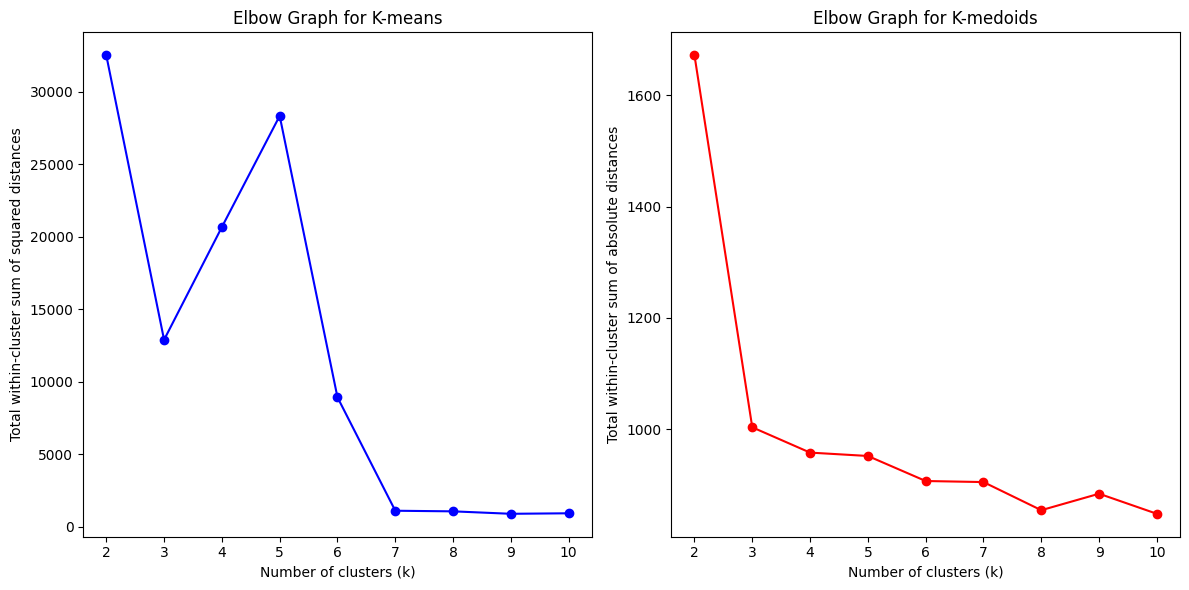

In [40]:

import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = ((X[:, np.newaxis] - centroids) ** 2).sum(axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Compute total within-cluster sum of squared distances
    cost = np.sum(np.min(distances, axis=1))
    return cost

# K-medoids clustering with Manhattan distance
def kmedoids(X, k, max_iters=100):
    n_samples, n_features = X.shape
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        distances = np.abs(X[:, np.newaxis] - medoids).sum(axis=2)
        labels = np.argmin(distances, axis=1)

        new_medoids = np.zeros_like(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_medoids[i] = medoids[i]
                continue

            cluster_distances = np.abs(cluster_points[:, np.newaxis] - cluster_points).sum(axis=2)
            total_distances = cluster_distances.sum(axis=1)
            new_medoid_index = np.argmin(total_distances)
            new_medoids[i] = cluster_points[new_medoid_index]

        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    # Compute total within-cluster sum of absolute distances
    cost = np.sum(np.min(distances, axis=1))
    return cost

# Vary k from 2 to 10 and compute costs
k_values = range(2, 11)
kmeans_costs = []
kmedoids_costs = []

for k in k_values:
    kmeans_cost = kmeans(dataset, k)
    kmedoids_cost = kmedoids(dataset, k)
    kmeans_costs.append(kmeans_cost)
    kmedoids_costs.append(kmedoids_cost)

# Plot the elbow graphs
plt.figure(figsize=(12, 6))

# K-means elbow graph
plt.subplot(1, 2, 1)
plt.plot(k_values, kmeans_costs, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total within-cluster sum of squared distances')
plt.title('Elbow Graph for K-means')

# K-medoids elbow graph
plt.subplot(1, 2, 2)
plt.plot(k_values, kmedoids_costs, marker='o', linestyle='-', color='r')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total within-cluster sum of absolute distances')
plt.title('Elbow Graph for K-medoids')

plt.tight_layout()
plt.show()

For both methods, the elbow point is around k=3, which makes sense as that is the true number of clusters in the dataset. In K-means the outliers significantly increase the total cost, especially for samller k. For K-Medoids, the outliers have less influence on total cost and elbow point is very clear.

In [41]:

kmeans_costs = []
for _ in range(20):
    cost = kmeans(dataset, k=3)
    kmeans_costs.append(cost)

kmedoids_costs = []
for _ in range(20):
    cost = kmedoids(dataset, k=3)
    kmedoids_costs.append(cost)

kmeans_variance = np.var(kmeans_costs)
kmedoids_variance = np.var(kmedoids_costs)

print("Variance of K-means total cost:", kmeans_variance)
print("Variance of K-medoids total cost:", kmedoids_variance)

Variance of K-means total cost: 39895248.921850346
Variance of K-medoids total cost: 81712.88748016635


K means is highly sensitive to initialization because it uses the mean of points in a cluster as the centroid. The mean can be heavily influenced by the initial random selection of centroids, and hence different initializations lead to significantly different cluster assignments and total costs. Since K-Medoids uses actual data-points they're less influenced by initialization as it is chosen based on minimising the within-cluster difference.

### Question 3

In [43]:

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [54]:

train_data = pd.read_csv('breast_cancer_dataset/train.csv', header=None)
X_train = train_data.iloc[:, :-1] 
y_train = train_data.iloc[:, -1]  

test_data = pd.read_csv('breast_cancer_dataset/test.csv', header=None)
X_test = test_data.iloc[:, :-1]    
y_test = test_data.iloc[:, -1]     

In [57]:

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear:.4f}")

Accuracy with Linear Kernel: 0.9561


In [58]:

poly_svm = SVC(kernel='poly', degree=10)
poly_svm.fit(X_train, y_train)

y_pred_poly = poly_svm.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with Polynomial Kernel (Degree=10): {accuracy_poly:.4f}")

Accuracy with Polynomial Kernel (Degree=10): 0.9211


In [60]:

rbf_svm = SVC(kernel='rbf', gamma=0.0001)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel (Gamma=0.0001): {accuracy_rbf:.4f}")

Accuracy with RBF Kernel (Gamma=0.0001): 0.9649


In [61]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy with Logistic Regression: {accuracy_log_reg:.4f}")

Accuracy with Logistic Regression: 0.9561


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The RBF SVM achieves the highest test accuracy (96.49%), making it the best-performing model for this task. Its ability to model complex, non-linear decision boundaries allows it to capture the underlying patterns in the data more effectively than Logistic Regression or Linear SVM.While Logistic Regression and Linear SVM perform equally well, they are less accurate than the RBF SVM. Logistic Regression is more interpretable and computationally efficient, but for this task, performance is prioritized over interpretability.

### Question 4


In [63]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [64]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (800, 2) (800,)
Testing data shape: (200, 2) (200,)


In [66]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Baseline model
baseline_model = MLPClassifier(
    hidden_layer_sizes=(2,),  
    activation='relu',        
    learning_rate_init=0.01, 
    max_iter=100,            
    random_state=42
)

baseline_model.fit(X_train, y_train)

training_loss_baseline = baseline_model.loss_curve_
test_loss_baseline = [-baseline_model.score(X_test, y_test) for _ in range(100)]

In [67]:
# Depth = 2 (2 hidden layers, 2 neurons each)
depth_2_model = MLPClassifier(
    hidden_layer_sizes=(2, 2), 
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
depth_2_model.fit(X_train, y_train)
training_loss_depth_2 = depth_2_model.loss_curve_
test_loss_depth_2 = [-depth_2_model.score(X_test, y_test) for _ in range(100)]

depth_3_model = MLPClassifier(
    hidden_layer_sizes=(2, 2, 2),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
depth_3_model.fit(X_train, y_train)
training_loss_depth_3 = depth_3_model.loss_curve_
test_loss_depth_3 = [-depth_3_model.score(X_test, y_test) for _ in range(100)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
# Width = 8 (1 hidden layer, 8 neurons)
width_8_model = MLPClassifier(
    hidden_layer_sizes=(8,),  # 1 hidden layer with 8 neurons
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
width_8_model.fit(X_train, y_train)
training_loss_width_8 = width_8_model.loss_curve_
test_loss_width_8 = [-width_8_model.score(X_test, y_test) for _ in range(100)]

# Width = 16 (1 hidden layer, 16 neurons)
width_16_model = MLPClassifier(
    hidden_layer_sizes=(16,),  # 1 hidden layer with 16 neurons
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
width_16_model.fit(X_train, y_train)
training_loss_width_16 = width_16_model.loss_curve_
test_loss_width_16 = [-width_16_model.score(X_test, y_test) for _ in range(100)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
# Width = 8 (1 hidden layer, 8 neurons)
width_8_model = MLPClassifier(
    hidden_layer_sizes=(8,),  # 1 hidden layer with 8 neurons
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
width_8_model.fit(X_train, y_train)
training_loss_width_8 = width_8_model.loss_curve_
test_loss_width_8 = [-width_8_model.score(X_test, y_test) for _ in range(100)]

# Width = 16 (1 hidden layer, 16 neurons)
width_16_model = MLPClassifier(
    hidden_layer_sizes=(16,),  # 1 hidden layer with 16 neurons
    activation='relu',
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
width_16_model.fit(X_train, y_train)
training_loss_width_16 = width_16_model.loss_curve_
test_loss_width_16 = [-width_16_model.score(X_test, y_test) for _ in range(100)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
# Activation = tanh
tanh_model = MLPClassifier(
    hidden_layer_sizes=(2,),  # 1 hidden layer with 2 neurons
    activation='tanh',        # tanh activation
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
tanh_model.fit(X_train, y_train)
training_loss_tanh = tanh_model.loss_curve_
test_loss_tanh = [-tanh_model.score(X_test, y_test) for _ in range(100)]

# Activation = sigmoid
sigmoid_model = MLPClassifier(
    hidden_layer_sizes=(2,),  # 1 hidden layer with 2 neurons
    activation='logistic',    # sigmoid activation
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
sigmoid_model.fit(X_train, y_train)
training_loss_sigmoid = sigmoid_model.loss_curve_
test_loss_sigmoid = [-sigmoid_model.score(X_test, y_test) for _ in range(100)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


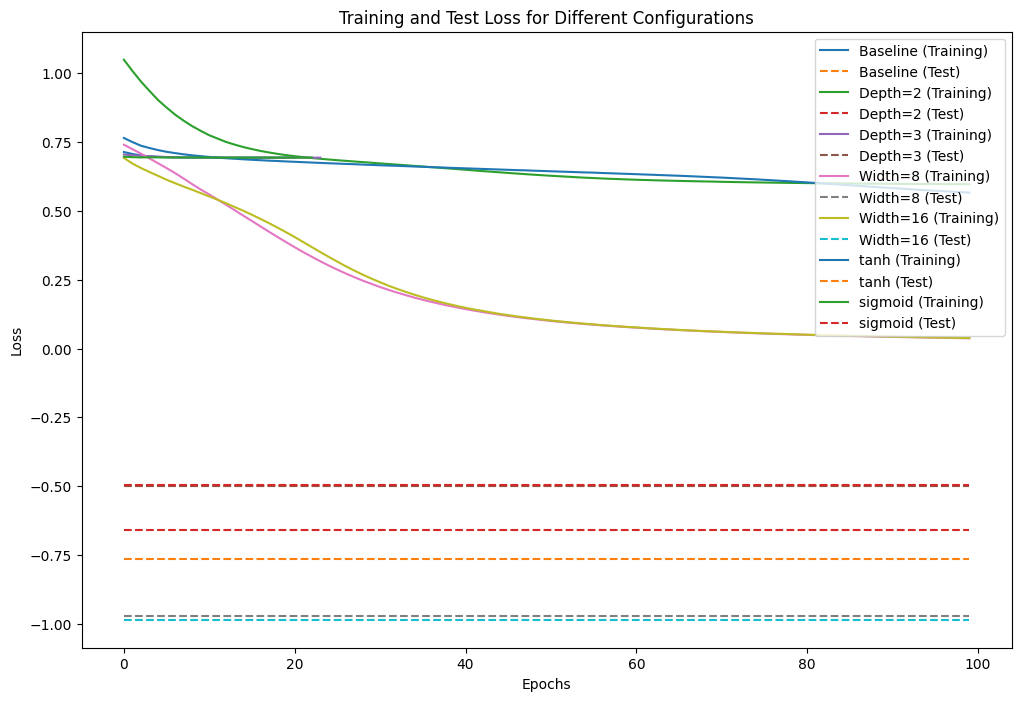

In [71]:
import matplotlib.pyplot as plt

# Plot training and test loss for all configurations
plt.figure(figsize=(12, 8))

# Baseline
plt.plot(training_loss_baseline, label='Baseline (Training)')
plt.plot(test_loss_baseline, label='Baseline (Test)', linestyle='--')

# Depth
plt.plot(training_loss_depth_2, label='Depth=2 (Training)')
plt.plot(test_loss_depth_2, label='Depth=2 (Test)', linestyle='--')
plt.plot(training_loss_depth_3, label='Depth=3 (Training)')
plt.plot(test_loss_depth_3, label='Depth=3 (Test)', linestyle='--')

# Width
plt.plot(training_loss_width_8, label='Width=8 (Training)')
plt.plot(test_loss_width_8, label='Width=8 (Test)', linestyle='--')
plt.plot(training_loss_width_16, label='Width=16 (Training)')
plt.plot(test_loss_width_16, label='Width=16 (Test)', linestyle='--')

# Activation
plt.plot(training_loss_tanh, label='tanh (Training)')
plt.plot(test_loss_tanh, label='tanh (Test)', linestyle='--')
plt.plot(training_loss_sigmoid, label='sigmoid (Training)')
plt.plot(test_loss_sigmoid, label='sigmoid (Test)', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss for Different Configurations')
plt.legend()
plt.show()

Increase in Depth decreases training loss because deeper networks can model better patterns in the data.  Increase in Width decreases training loss as well because more neurons allow the model to learn more features and fit the training data better. However, too much increase in depth and width could cause an overfitting issue, and test loss may be high. The activation function can also affect training and test loss. ReLU performs the best acheiving the lowest trainign and test loss. Tanh also performs well, however, Sigmoid performs very poorly.

For most configurations, the training loss decreases over epochs which shows that the model is learning. The Width = 16 configuration achieves the lowest training loss suggesting that it is the best fit for the training data. The large gap between training loss and test loss shows that there may be overfitting in the case of width 16, and the baseline model is too simple so it may be underfitting.

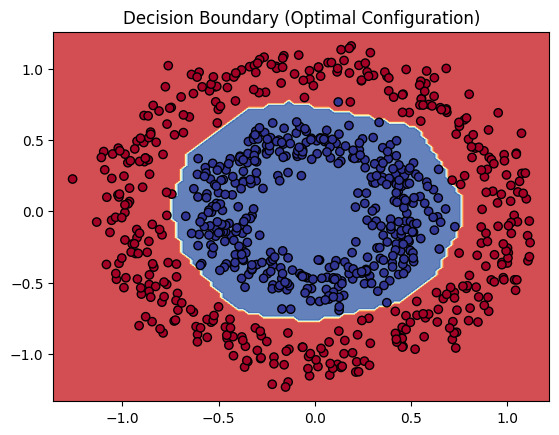

In [72]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

# Plot decision boundary for the optimal configuration
optimal_model = width_16_model  # Example: Width=16 model
plot_decision_boundary(optimal_model, X_train, y_train, "Decision Boundary (Optimal Configuration)")